# Projet IAS Voitures

# Sommaire

## 1. [Prétraitement](#1---Prétraitement)
### 1.1 [Netoyage des donnes](#1.1---Nétoyage-des-données)
### 1.2 [Transformation texte en one hot](#1.2---Transformation-texte-en-one-hot)
### 1.3 [Regrouppement des modèles de voiture](#1.3---Regrouppement-des-modèles-de-voiture)
### 1.4 [Regression linéaire sans standardisation](#1.4-Annexe---Regression-linéaire-sans-standardisation)

## 2. [Standardisation](#2---Standardisation)

## 3. [Modèles](#3---Modèles)
### 3.1 [Régression linéaire](#3.1---Régression-linéaire)
### 3.2 [Random Forest](#3.2---Random-Forest)

## 4. [Analyse](#4---Analyse)

___

#  1 - Prétraitement

### Imports nécessaire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [2]:
cars = pd.read_csv('cars.csv')
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
#on supprime les features_x car inutilisables
cars = cars.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [4]:
#presentation des valeurs du dataset
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


___

### 1.1 - Nétoyage des données

In [5]:
#On supprime les lignes avec des valeurs nulles
cars = cars.dropna()
#on verifie si il reste des valeurs nulles
cars.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

In [6]:
#gas et gasoline etant designant la même chose on transforme tous les gas en gasoline
cars['engine_fuel'] = cars['engine_fuel'].replace('gas','gasoline')


# Pour obtenir l'age
cars['age'] = cars['year_produced'].map(lambda x : 2020 - x )
cars = cars.drop(columns=['year_produced'])



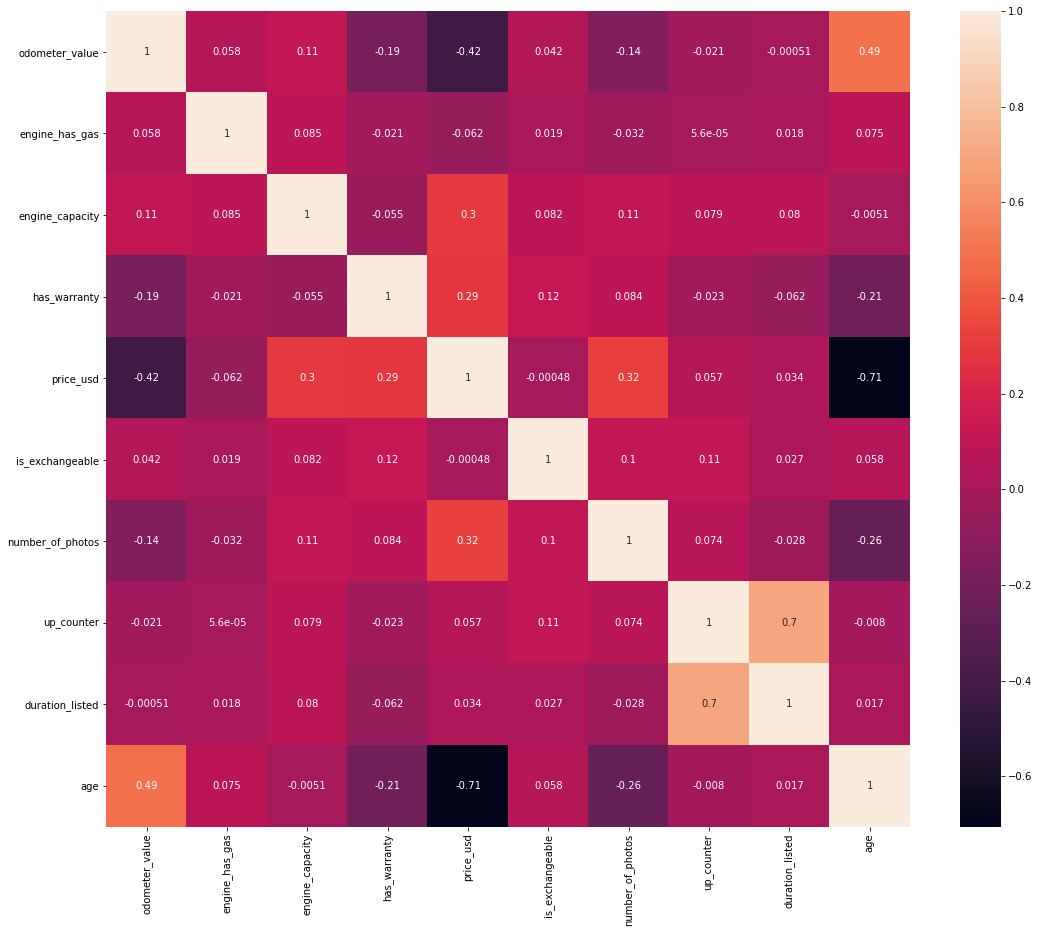

In [7]:
correlation = cars.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation, annot=True)
plt.show()

___

### 1.2 - Transformation texte en one hot

Les colonnes ```['manufacturer_name','model_name','color','engine_fuel','engine_type',
'transmission','body_type','state','drivetrain','location_region'] ``` sont des String. On doit les convertir afin de pouvoir les utiliser dans nos calculs numérique.<br>
Toutes ses colonnes ont un nombre finis de valeurs unique. La plupart ne peuvent pas être hiérarchisé, une conversion en dictionnaire tel que : ["a" : 1; "b" : 2; "c" : 3] n'est donc pas viable.<br>
Nous avons plutôt opté pour une transformation en one hot, on converti une colonne en vecteur one hot puis on ajoute chacune des valeurs unique en nouvelle colonne. Pour chaque ligne on a un booleen (1 ou 0) qui indiquera si il a cette valeur (il aura donc 0 pour toutes les autres colonnes);<br> 
ex :

| fuel_essence | fuel_electrique | fuel_diesel |
| :-           | :-              | :-          |
| 0            | 1               | 0           |




In [8]:
#transforme une colonne en one hot
def texte_to_hot(X_column):  
    onehotencoder = sklearn.preprocessing.OneHotEncoder(categories='auto')
    X_column = onehotencoder.fit_transform(X_column.reshape(-1,1))
    return X_column

#ajoute une colonne transformé en one hot au data frame
#on ajoute une colonne pour chaque valeur unique 
def add_oneHot(X_data,columns_name, array_name, oneHot):
    for i in range(len(array_name)):
        array_name[i] = array_name[i].replace(" ", "_")
        X_data[columns_name+"_"+array_name[i]] = oneHot[:,i] 
    return X_data

#a partir d'un data frame recupere toutes les colonnes de texte 
#pour chacunes d'elles on les transforme en one hot et ajoute au data frame
def convert_data_oneHot(X):
    colonnes_texte = X.select_dtypes(include=['object'])
    for name in colonnes_texte.columns:
        X = X.drop(columns=[name])
        unique_name = np.unique(colonnes_texte[name])
        onehot = texte_to_hot(colonnes_texte[name].values)
        X = add_oneHot(X, name, unique_name, onehot.toarray())
    return X

___

### 1.3 - Regrouppement des modèles de voiture

In [9]:
#k est un hyper-parametre qui demande plus de test car si la cette colonne est influante on doit affiner pour 
#ne pas desequilibrer le dataset avec un model 'other_model' trop imposant
def add_model_name(X,k):
    model_names, frequency = np.unique(X['model_name'],return_counts = True)
    X['model_name'] = X['model_name'].replace(model_names[frequency < k],'other_model')
    return X

#debug print de la frequence apres la mise à jour 
#model_names, frequency = np.unique(cars['model_name'],return_counts = True)
#print(frequency)

**Quelques lignes utiles pour comprendre la conversion des données**

anciennes features sans utiliser les colonnes de texte
```python
['manufacturer_name','model_name','color','engine_fuel','engine_type',
 'transmission','body_type','state','drivetrain','location_region']
```
___

on enleve le prix car c'est notre prediction<br>
```python
features = cars.drop(columns=['price_usd'])
label = cars['price_usd']
```
on décommente l'un ou l'autre
* ```features = features.drop(columns=['model_name'])```
* ```features = add_model_name(features,100);```
___
On converti l'ensemble de nos colonnes de texte en one hot: 
```features = convert_data_oneHot(features)```
___
Permet de verifier le nombre de colonnes dans notre dataFrame <br>
```print(cars.shape)``` => (38521, 20)<br>
```print(features.shape)``` => (38521, 108)<br>
On remarque bien l'ajout des valeurs des one hot en nouvelles colonnes
___
Affichage des colonnes, on peut maintenant voir les nouvelles colonnes ajoutées<br>
```python
for i in features.columns:
    print(i)
```

___

### 1.4 Annexe - Regression linéaire sans standardisation

train error 10500151.242751325
test error 11234416.835935317


<ipython-input-10-2bbeb4397835>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


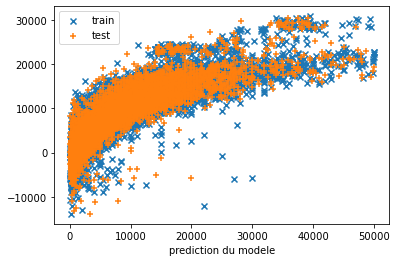

In [10]:
# Regression linéaire avant la standardisation
features = cars.copy(deep=True)
features = features.drop(columns=['price_usd'])
features = features.drop(columns=['model_name'])
label = cars['price_usd']
features = convert_data_oneHot(features)

X = features.values
Y = label.values
test_ratio = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)
alpha_etoile = 0.1
monModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)
monModele.fit(X_train, Y_train)
Y_train_pred = monModele.predict(X_train)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

Y_test_pred = monModele.predict(X_test)
print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

xmin= min(Y_train.min(), Y_train_pred.min() )-1
xmax= max(Y_train.max(), Y_train_pred.max() )+1

fig = plt.figure(1)
plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

# plt.scatter(??, ??, marker='x', label='train')
# plt.scatter(??, ??, marker='+', label='test')
plt.legend()
plt.xlabel('verite terrain')
plt.xlabel('prediction du modele') # xlabel ou ylabl: a vous de voir

ax = fig.add_subplot(111)


# TODO
faire une analyse du train et test error et expliquer pourquoi la standardisation est necessaire

___

## 2 - Standardisation

# TODO
expliquer c'est quoi et comment on fait la standardisation

In [11]:
def standardisation(X,scaler):
    #On effectue la standardisation dans une copie
    cars_standard = X.copy(deep=True)
    cars_standard = convert_data_oneHot(cars_standard)
    cars_standard[cars_standard.columns] = scaler.fit_transform(cars_standard[cars_standard.columns])
    return cars_standard.copy(deep=True)

In [12]:
#L'ajout du nom des models n'apporte pas une meilleur precision 
# et rallonge considerablement le temps de calcul on choisi donc de l'enlever
#Dans le cas où l'on veut les garder on dispose d'une fonction pour regroupper les model ayant moins de k lignes
#k = 10
#cars_standard = add_model_name(cars_standard,k);

scaler = MinMaxScaler()
# On effectue la standardisation dans une copie
cars_standard = cars.copy(deep=True)
cars_standard = cars_standard.drop(columns=['model_name'])
cars_standard = convert_data_oneHot(cars_standard)
cars_standard[cars_standard.columns] = scaler.fit_transform(cars_standard[cars_standard.columns])



In [13]:
#on peut observer les valeurs standardisées comprisent entre 0 et 1
cars_standard.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская_обл.,location_region_Витебская_обл.,location_region_Гомельская_обл.,location_region_Гродненская_обл.,location_region_Минская_обл.,location_region_Могилевская_обл.
0,0.190,0.0,0.294872,0.0,0.217984,0.0,0.094118,0.006452,0.007168,0.116883,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.290,0.0,0.358974,0.0,0.099982,1.0,0.129412,0.028495,0.037186,0.220779,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.402,0.0,0.294872,0.0,0.055981,1.0,0.035294,0.038172,0.067652,0.233766,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.010,0.0,0.358974,0.0,0.199964,1.0,0.094118,0.022043,0.038530,0.259740,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.280,0.0,0.294872,0.0,0.042663,1.0,0.152941,0.003226,0.003136,0.233766,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


___

# 3 - Modèles

### Split Train Test

In [14]:
#On pop au lieu de selectionner les colonnes directement car on conserve le format pandas
Y = cars_standard.pop('price_usd')
X = cars_standard
test_ratio = 0.3
train_ratio = 0.7

seed = 42

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)


In [15]:
#Fonction permettant de visualiser simplement nos données pred vs test d'un model
def plot_pred(X_train,X_test,Y_train,Y_test,model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))
    print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

    xmin= min(Y_train.min(), Y_train_pred.min() )-1
    xmax= max(Y_train.max(), Y_train_pred.max() )+1

    fig = plt.figure(1)
    plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
    plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

    plt.legend()
    plt.xlabel('verite terrain')
    plt.xlabel('prediction du modele')

    ax = fig.add_subplot(111)


## 3.1 - Régression linéaire 

In [16]:
#on fit seulement alpha,les autres param ayant été testé et n'ayant aucunes influences remarquables
ridge = sklearn.linear_model.Ridge()
parameters = {'alpha' : [1,0.1,0.01,0.001,0.0001]}

alpha = [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
gs = GridSearchCV(estimator=ridge, param_grid=parameters,cv=5,n_jobs=-1, verbose=1)

gs.fit(X_train, Y_train)

#meilleur score avec un fit des hyper-paramètres données
print(gs.best_score_)
#paramètres associers à ce score
print(gs.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7393588239133632
{'alpha': 1}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.5s finished


In [17]:
#on recupère les meilleurs paramètres, ici seulement alpha
bp = gs.best_params_

#on peut maintenant refaire notre modele 
ridge = sklearn.linear_model.Ridge( alpha=bp['alpha'])
ridge.fit(X_train, Y_train)

print("lineaire",ridge.score(X_test,Y_test))
#le resultat n'est pas très bon
#surement parce que le prix des voitures n'est pas réparti uniformement
#ce model souffre particulièrement de la répartitions des valeurs de notre dataset

lineaire 0.736939589803238


train error 0.0041996236253025515
test error 0.004486791469140791


<ipython-input-15-47eb9cd32cb3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


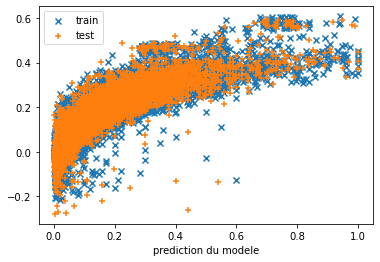

In [18]:
#on observe notre prediction
plot_pred(X_train,X_test,Y_train,Y_test,ridge)

___

## 3.2 - Random Forest

In [19]:
#les params sont à regler pour le meilleur resultat
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5]
              , "min_samples_split" : [1,10]
              , "max_depth": [10]
              , "n_estimators": [100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.2min finished


In [20]:
#Affichage des meilleurs parametres et le score associé 
print(gs.best_score_)
print(gs.best_params_)

0.8862239750705087
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


train error 0.0011995332397186616
test error 0.001859614338865463


<ipython-input-15-47eb9cd32cb3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


Score: 0.89


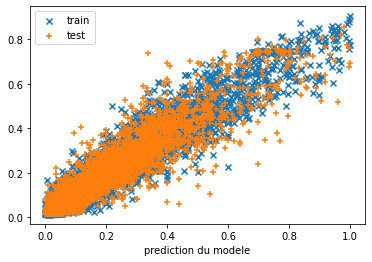

In [21]:
#on recommence avec les meilleurs params trouvées 
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])

forest.fit(X_train, Y_train)

#on observe notre prediction
plot_pred(X_train,X_test,Y_train,Y_test,forest)

print('Score: %.2f' % forest.score(X_test, Y_test))

In [22]:
#on change les options d'affichage de pandas
#permet de print autant de ligne que l'on veut
pd.set_option('display.max_rows', None)
#format de float plus lisible : 123456.e-1 => 0.12345
pd.options.display.float_format = '{:.5f}'.format

In [23]:
#print les colonnes les plus influentes  

#on transpose afin d'avoir une meilleur lisibilité
important_features = pd.DataFrame(data=[X_train.columns,forest.feature_importances_]).T
#rename des colonnes
important_features = important_features.rename(columns={0: "Feature", 1: "Influence"})
#tri sur l'influence
important_features.sort_values(by=['Influence'],ascending=False,inplace=True)
#option de pandas pour un affichage plus joli, on masque l'index
important_features.style.hide_index()
#l'age est de tres loin la feature la plus influante, nous allons devoir tester plus amplement 
#notre model avec cette feature

Feature,Influence
age,0.668902
drivetrain_front,0.126173
engine_capacity,0.094334
odometer_value,0.030312
transmission_mechanical,0.007005
body_type_minibus,0.005777
transmission_automatic,0.005126
number_of_photos,0.004442
duration_listed,0.004011
engine_fuel_gasoline,0.003976


In [24]:
#on compare nos scores
print("lineare",ridge.score(X_test,Y_test))
print("forest",forest.score(X_test,Y_test))
#la random forest donne un score nettement meilleur
#on va donc l'utiliser pour la suite de nos calculs

lineare 0.736939589803238
forest 0.8909708832794478


In [25]:
def plot_test_pred(data, mask, model,scaler):
    filtered_cars = data.copy(deep=True)
    filtered_cars = filtered_cars.drop(columns=['model_name'])
    filtered_cars = convert_data_oneHot(filtered_cars)
    filtered_cars = standardisation(filtered_cars,scaler)
    filtered_cars = filtered_cars[mask]
    Y = filtered_cars.pop('price_usd')
    X = filtered_cars
    
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=31)
    
    #elles sont dans la fonction plot_pred
    #Y_train_pred = model.predict(X_train)
    #print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))
    #Y_test_pred = model.predict(X_test)
    #print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

    print("Score du model",model.score(X,Y))
    
    #plot pour avoir une representation graphique
    plot_pred(X_train,X_test,Y_train,Y_test,model)
    
    return filtered_cars.copy(deep=True)

Score du model 0.7056690239404804
train error 0.00045404575126136945
test error 0.0004789794680236478


<ipython-input-15-47eb9cd32cb3>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


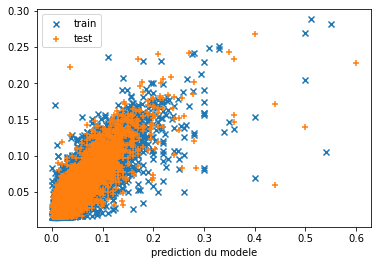

In [26]:
#Le mask est à faire sur notre dataset standardisé sinon on perd des features
#sinon le model ne fonctionnera pas

#mask = cars_standard.age < cars_standard.age.mean()
#Score du model 0.87668998856452

mask = cars_standard.age > cars_standard.age.mean()
#Score du model 0.702090016987009


data_mask = plot_test_pred(cars,mask,forest,scaler)

#nous avions déjà définie l'age comme une feature tres influante
#avec ces mask on peut trouver une des faiblesses notre model
#plus une voiture est vielle (et donc moins chère) plus la precision baisse
#on peut conjecturer que notre model est plus performant à predir des voitures chères

In [27]:
#on ne veux pas print les 38.000 lignes
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:.2f}'.format

In [28]:
cars_test = X.copy(deep=True)
price_test = Y.copy(deep=True)
cars_test.insert(4,'price_usd',price_test)
cars_test[cars_test.columns] = scaler.inverse_transform(cars_test[cars_test.columns])
cars_test.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская_обл.,location_region_Витебская_обл.,location_region_Гомельская_обл.,location_region_Гродненская_обл.,location_region_Минская_обл.,location_region_Могилевская_обл.
0,190000.00,0.00,2.50,0.00,10900.00,0.00,9.00,13.00,16.00,10.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,290000.00,0.00,3.00,0.00,5000.00,1.00,12.00,54.00,83.00,18.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,402000.00,0.00,2.50,0.00,2800.00,1.00,4.00,72.00,151.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,10000.00,0.00,3.00,0.00,9999.00,1.00,9.00,42.00,86.00,21.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,280000.00,0.00,2.50,0.00,2134.11,1.00,14.00,7.00,7.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [29]:
cars_pred = X.copy(deep=True)
price_pred = forest.predict(cars_pred)
cars_pred.insert(4,'price_usd',price_pred)
cars_pred[cars_pred.columns] = scaler.inverse_transform(cars_pred[cars_pred.columns])
cars_pred.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская_обл.,location_region_Витебская_обл.,location_region_Гомельская_обл.,location_region_Гродненская_обл.,location_region_Минская_обл.,location_region_Могилевская_обл.
0,190000.00,0.00,2.50,0.00,12139.98,0.00,9.00,13.00,16.00,10.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,290000.00,0.00,3.00,0.00,6226.01,1.00,12.00,54.00,83.00,18.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,402000.00,0.00,2.50,0.00,4404.55,1.00,4.00,72.00,151.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,10000.00,0.00,3.00,0.00,5353.83,1.00,9.00,42.00,86.00,21.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,280000.00,0.00,2.50,0.00,4251.58,1.00,14.00,7.00,7.00,19.00,...,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [30]:
#on peut donc remarquer que notre model n'est pas si précis en moyenne  
np.sqrt(sklearn.metrics.mean_squared_error(cars_test.price_usd,cars_pred.price_usd))

1869.1667008128209

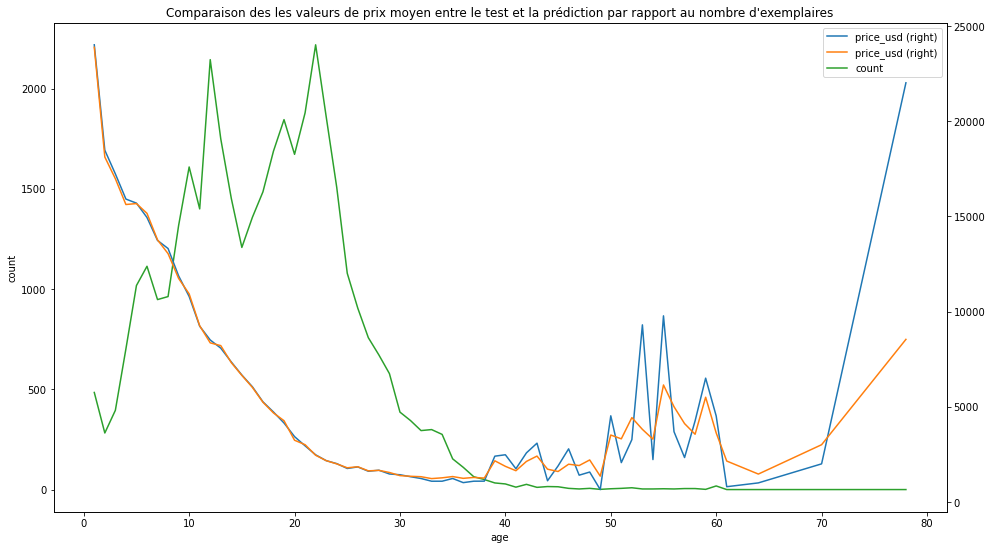

In [31]:
#Si on veut faire des masques pour observer des parties plus précisément
#age_min = 15
#age_max = 40
#cars_test_age = cars_test[(cars_test.age >= age_min) &(cars_test.age < age_max)] 
#cars_pred_age = cars_pred[(cars_test.age >= age_min) &(cars_test.age < age_max)] 

ref = 'age'

col = cars_pred.age
c = Counter(col)

freq = pd.DataFrame.from_records(list(dict(c).items()), columns=[ref,'count']).set_index(ref)
df = pd.DataFrame(cars_test.groupby([ref])['price_usd'].mean())
prix = pd.DataFrame(cars_pred.groupby([ref])['price_usd'].mean())

df = pd.concat([df, prix,freq], axis=1, join='inner').sort_index()
df.plot(kind= 'line', secondary_y='price_usd', xlabel=ref, ylabel='count', figsize=(16,9))
plt.title('Comparaison des les valeurs de prix moyen entre le test et la prédiction par rapport au nombre d\'exemplaires')

plt.show()

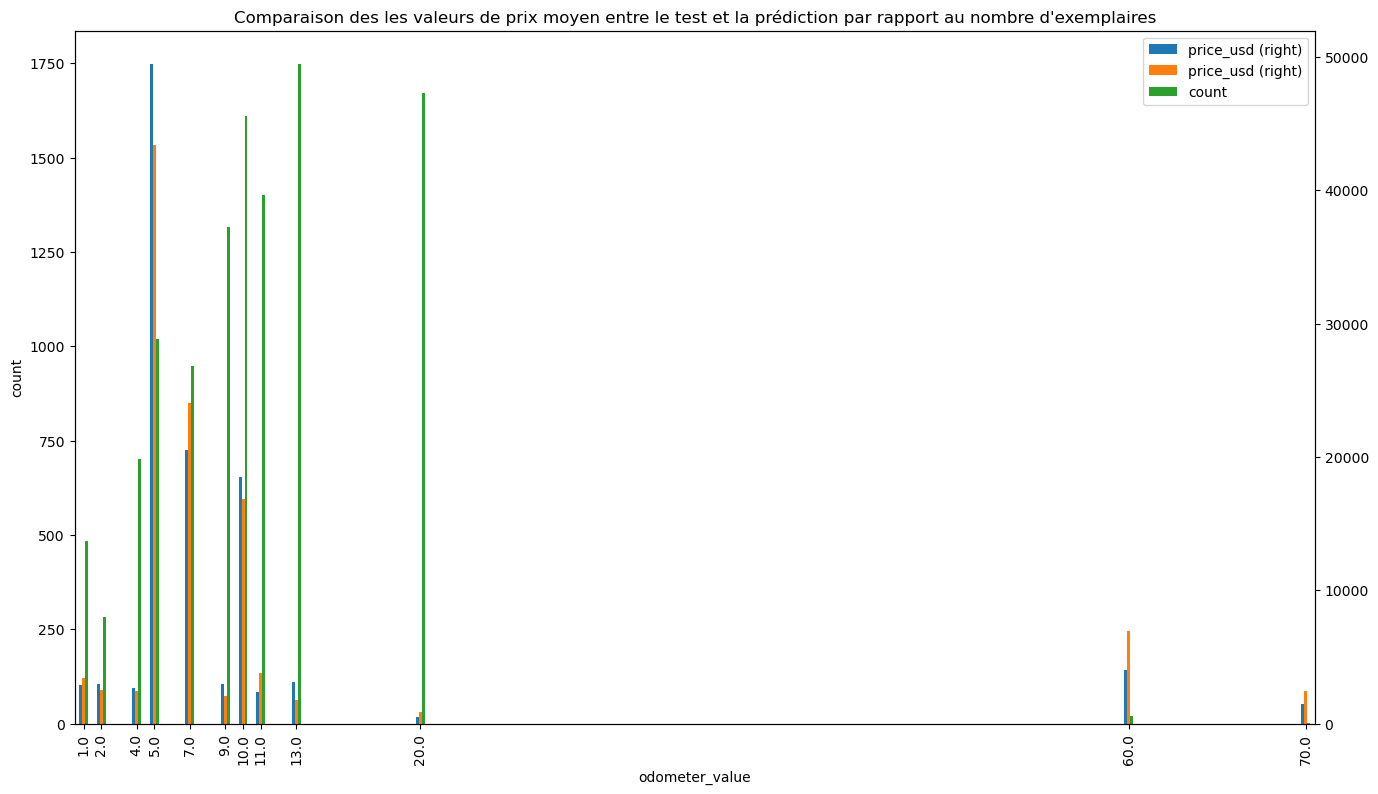

In [32]:
ref = 'odometer_value'

col = cars_pred.age
c = Counter(col)

freq = pd.DataFrame.from_records(list(dict(c).items()), columns=[ref,'count']).set_index(ref)
df = pd.DataFrame(cars_test.groupby([ref])['price_usd'].mean())
prix = pd.DataFrame(cars_pred.groupby([ref])['price_usd'].mean())

df = pd.concat([df, prix,freq], axis=1, join='inner').sort_index()
mpl.style.use('default')
df.plot(kind= 'bar', secondary_y='price_usd', xlabel=ref, ylabel='count', figsize=(16,9))
plt.title('Comparaison des les valeurs de prix moyen entre le test et la prédiction par rapport au nombre d\'exemplaires')

plt.show()

In [33]:
#bcp de vielle voiture pas chere alors que la moyenne du prix est 6000
#bref bcp de voitures pas chere, et bcp de jeunes voitures tres tres chere
#cars.price_usd.median() 4800.0
#cars[cars.age < 5].price_usd.median() 15983.24
#regarder les histos et analyser on peut conclure qu'on aurait deux separer le modele en deux, une 
#partie sur un model cher et l'autre sur les pas chere vielle
#ref prix histo prix moyen par année


erreur_moyenne = np.sqrt(sklearn.metrics.mean_squared_error(cars_test[cars_test.age < 10 ].price_usd
                                           ,cars_pred[cars_pred.age < 10 ].price_usd))
print("erreur moyenne en fonction d'un mask : ",erreur_moyenne)
#on remarque également que le prix moyen est très faible
print("prix moyen des voitures du dataset : ",cars.price_usd.mean())
print("prix median des voitures du dataset : ",cars.price_usd.median())
#l'ecart entre la moyenne et la mediane est un point très important du dataset
#les voitures chères déséquilibre notre dataset, nous avont une moitié de voitures 

erreur moyenne en fonction d'un mask :  3191.0876680317433
prix moyen des voitures du dataset :  6637.160884193038
prix median des voitures du dataset :  4800.0


In [34]:
#on peut tester le score sur ce dataset
#faire les predicts et comparer les preds en fonctions des cars pour trouver des faiblesses/overfit possibles
#pour chaque voiture je calcul diff(pred,reel) (sur test ou train)